# Destination Healthcare Ltd

## Company Introduction

Your client for this project is Destination Healthcare Ltd, a prominent healthcare organization founded in 1949 and headquartered in Delhi, India. The company operates a chain of specialist hospitals, clinics, diagnostics centers, medical centers, and pharmacies across India, the Middle East, Mauritius, and Sri Lanka. It ranks among the top 10 healthcare companies in India.

## Current Scenario

The organization aims to optimize healthcare management by observing patients' lengths of stay. This will enable the identification of patients who may require longer stays upon admission. Automating the prediction of Length of Stay is crucial for optimizing treatment plans and logistical planning for room and bed allocations.

The current manual forecasting process suffers from several issues, including:

- Tedious and time-consuming predictions for each patient
- Dependence on human judgment and doctor opinions
- Lack of scalability for handling a growing number of patients

## Project Objectives

The goal is to build a classification model that automates the prediction of the Length of Stay for each patient. This model will enable optimal resource allocation and improve hospital efficiency based on historical data.

## Your Role

As a data science consultant, your role involves:

- Analyzing the provided dataset
- Building a classification model
- Automating the prediction of Length of Stay

## Project Deliverables

- **Deliverable:** Length of Stay for each Patient
- **Machine Learning Task:** Classification
- **Target Variable:** Stay
- **Win Condition:** Best possible model

## Evaluation Metric

The model will be evaluated based on the **Accuracy score**.

## Project Workflow

1. Exploratory Data Analysis (EDA)
2. Data Preprocessing
3. Feature Engineering
4. Model Selection and Training
5. Model Evaluation



In [1]:
# Importing the libraries required for the analysis 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics.pairwise import cosine_similarity
import warnings
warnings.filterwarnings('ignore')
# Loading data from CSV files
train = pd.read_csv("C:\\Users\\irosh\\OneDrive\\Documents\\data\\data\\train_data.csv")
test= pd.read_csv("C:\\Users\\irosh\\OneDrive\\Documents\\data\\data\\test_data.csv")

In [2]:
#displaying the first 10 rows
train.head(10)

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911.0,0
1,2,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954.0,4
2,3,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745.0,3
3,4,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272.0,4
4,5,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558.0,4
5,6,23,a,6,X,2,anesthesia,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,4449.0,1
6,7,32,f,9,Y,1,radiotherapy,S,B,3.0,31397,7.0,Emergency,Extreme,2,51-60,6167.0,0
7,8,23,a,6,X,4,radiotherapy,Q,F,3.0,31397,7.0,Trauma,Extreme,2,51-60,5571.0,4
8,9,1,d,10,Y,2,gynecology,R,B,4.0,31397,7.0,Trauma,Extreme,2,51-60,7223.0,5
9,10,10,e,1,X,2,gynecology,S,E,3.0,31397,7.0,Trauma,Extreme,2,51-60,6056.0,3


In [3]:

# Display basic information about the dataset
print(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 223000 entries, 0 to 222999
Data columns (total 18 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   case_id                            223000 non-null  int64  
 1   Hospital_code                      223000 non-null  int64  
 2   Hospital_type_code                 223000 non-null  object 
 3   City_Code_Hospital                 223000 non-null  int64  
 4   Hospital_region_code               223000 non-null  object 
 5   Available Extra Rooms in Hospital  223000 non-null  int64  
 6   Department                         223000 non-null  object 
 7   Ward_Type                          223000 non-null  object 
 8   Ward_Facility_Code                 223000 non-null  object 
 9   Bed Grade                          222925 non-null  float64
 10  patientid                          223000 non-null  int64  
 11  City_Code_Patient                  2203

In [4]:

# Checking for missing values
print("Missing values:")
print(train.isnull().sum())


Missing values:
case_id                                 0
Hospital_code                           0
Hospital_type_code                      0
City_Code_Hospital                      0
Hospital_region_code                    0
Available Extra Rooms in Hospital       0
Department                              0
Ward_Type                               0
Ward_Facility_Code                      0
Bed Grade                              75
patientid                               0
City_Code_Patient                    2685
Type of Admission                       0
Severity of Illness                     0
Visitors with Patient                   0
Age                                     0
Admission_Deposit                       0
Stay                                    0
dtype: int64


In [5]:

# Checking for missing values
print("Missing values:")
print(test.isnull().sum())


Missing values:
case_id                                 0
Hospital_code                           0
Hospital_type_code                      0
City_Code_Hospital                      0
Hospital_region_code                    0
Available Extra Rooms in Hospital       0
Department                              0
Ward_Type                               0
Ward_Facility_Code                      0
Bed Grade                              38
patientid                               0
City_Code_Patient                    1847
Type of Admission                       0
Severity of Illness                     0
Visitors with Patient                   0
Age                                     0
Admission_Deposit                       0
dtype: int64


In [6]:
# As the data has missing values let's fill the missing values
# Fill missing values
train['Bed Grade'].fillna(train['Bed Grade'].mode()[0], inplace=True)
train['City_Code_Patient'].fillna(train['City_Code_Patient'].mode()[0], inplace=True)

# Verifying that missing values are filled
train.isnull().sum()

#This code fills missing values in "Bed Grade" and "City_Code_Patient" with the mode (most frequent value) of each respective column. 

case_id                              0
Hospital_code                        0
Hospital_type_code                   0
City_Code_Hospital                   0
Hospital_region_code                 0
Available Extra Rooms in Hospital    0
Department                           0
Ward_Type                            0
Ward_Facility_Code                   0
Bed Grade                            0
patientid                            0
City_Code_Patient                    0
Type of Admission                    0
Severity of Illness                  0
Visitors with Patient                0
Age                                  0
Admission_Deposit                    0
Stay                                 0
dtype: int64

In [7]:
# As the data has missing values let's fill the missing values
# Filling missing values
test['Bed Grade'].fillna(test['Bed Grade'].mode()[0], inplace=True)
test['City_Code_Patient'].fillna(test['City_Code_Patient'].mode()[0], inplace=True)

# Verifying that missing values are filled
test.isnull().sum()

#This code fills missing values in "Bed Grade" and "City_Code_Patient" with the mode (most frequent value) of each respective column. 

case_id                              0
Hospital_code                        0
Hospital_type_code                   0
City_Code_Hospital                   0
Hospital_region_code                 0
Available Extra Rooms in Hospital    0
Department                           0
Ward_Type                            0
Ward_Facility_Code                   0
Bed Grade                            0
patientid                            0
City_Code_Patient                    0
Type of Admission                    0
Severity of Illness                  0
Visitors with Patient                0
Age                                  0
Admission_Deposit                    0
dtype: int64

In [8]:

# Displaying basic statistics
print("Basic statistics:")
print(train.describe())

Basic statistics:
             case_id  Hospital_code  City_Code_Hospital  \
count  223000.000000  223000.000000       223000.000000   
mean   111500.500000      18.536565            4.790807   
std     64374.699352       8.618496            3.092720   
min         1.000000       1.000000            1.000000   
25%     55750.750000      11.000000            2.000000   
50%    111500.500000      19.000000            5.000000   
75%    167250.250000      26.000000            7.000000   
max    223000.000000      32.000000           13.000000   

       Available Extra Rooms in Hospital      Bed Grade      patientid  \
count                      223000.000000  223000.000000  223000.000000   
mean                            3.164269       2.614771   65804.244031   
std                             1.147178       0.869027   37960.008108   
min                             0.000000       1.000000       2.000000   
25%                             2.000000       2.000000   32963.500000   
50%   

# Basic Statistics Report

###  Overview
The dataset consists of medical records related to hospital stays. Below are key statistics for each numerical variable:

**Case ID**
- **Mean:** 111500.5
- **Standard Deviation:** 64374.7
- **Minimum:** 1
- **25th Percentile:** 55750.75
- **Median (50th Percentile):** 111500.5
- **75th Percentile:** 167250.25
- **Maximum:** 223000

**Hospital Code**
- **Mean:** 18.54
- **Standard Deviation:** 8.62
- **Minimum:** 1
- **25th Percentile:** 11
- **Median:** 19
- **75th Percentile:** 26
- **Maximum:** 32

**City Code Hospital**
- **Mean:** 4.79
- **Standard Deviation:** 3.09
- **Minimum:** 1
- **25th Percentile:** 2
- **Median:** 5
- **75th Percentile:** 7
- **Maximum:** 13

**Available Extra Rooms in Hospital**
- **Mean:** 3.16
- **Standard Deviation:** 1.15
- **Minimum:** 0
- **25th Percentile:** 2
- **Median:** 3
- **75th Percentile:** 4
- **Maximum:** 21

**Bed Grade**
- **Mean:** 2.61
- **Standard Deviation:** 0.87
- **Minimum:** 1
- **25th Percentile:** 2
- **Median:** 3
- **75th Percentile:** 3
- **Maximum:** 4

**Patient ID**
- **Mean:** 65804.24
- **Standard Deviation:** 37960.01
- **Minimum:** 2
- **25th Percentile:** 32963.5
- **Median:** 65738
- **75th Percentile:** 98463.25
- **Maximum:** 131624

**City Code Patient**
- **Mean:** 7.08
- **Standard Deviation:** 4.48
- **Minimum:** 1
- **25th Percentile:** 4
- **Median:** 8
- **75th Percentile:** 8
- **Maximum:** 37

**Visitors with Patient**
- **Mean:** 3.29
- **Standard Deviation:** 1.77
- **Minimum:** 0
- **25th Percentile:** 2
- **Median:** 3
- **75th Percentile:** 4
- **Maximum:** 32

**Admission Deposit**
- **Mean:** 4911.31
- **Standard Deviation:** 1069.06
- **Minimum:** 1800
- **25th Percentile:** 4226
- **Median:** 4776
- **75th Percentile:** 5435
- **Maximum:** 11008

**Stay**
- **Mean:** 2.77
- **Standard Deviation:** 2.16
- **Minimum:** 0
- **25th Percentile:** 1
- **Median:** 2
- **75th Percentile:** 3
- **Maximum:** 10

**Observations**
- The **'Stay'** variable represents the duration of hospital stays, ranging from 0 to 10.

- Other features include hospital details, patient information, and admission-related data.

**Insights**

- The average hospital stay duration is approximately **2.77 days**, with a standard deviation of 2.16.

- Features like 'Available Extra Rooms in Hospital' and 'Visitors with Patient' show variability in their distributions.

In [9]:


# Checking unique values in categorical columns
print("Unique values in categorical columns:")
for column in train.select_dtypes(include='object').columns:
    print(f"{column}: {train[column].unique()}")

# Checking unique values in numerical columns
print("Unique values in numerical columns:")
for column in train.select_dtypes(include=['int64', 'float64']).columns:
    print(f"{column}: {train[column].unique()}")

Unique values in categorical columns:
Hospital_type_code: ['c' 'e' 'b' 'a' 'f' 'd' 'g']
Hospital_region_code: ['Z' 'X' 'Y']
Department: ['radiotherapy' 'anesthesia' 'gynecology' 'TB & Chest disease' 'surgery']
Ward_Type: ['R' 'S' 'Q' 'P' 'T' 'U']
Ward_Facility_Code: ['F' 'E' 'D' 'B' 'A' 'C']
Type of Admission: ['Emergency' 'Trauma' 'Urgent']
Severity of Illness: ['Extreme' 'Moderate' 'Minor']
Age: ['51-60' '71-80' '31-40' '41-50' '81-90' '61-70' '21-30' '11-20' '0-10'
 '91-100']
Unique values in numerical columns:
case_id: [     1      2      3 ... 222998 222999 223000]
Hospital_code: [ 8  2 10 26 23 32  1 22 16  9  6 29 12  3 21 28 27 19  5 14 13 31 24 17
 25 15 11 30 18  4  7 20]
City_Code_Hospital: [ 3  5  1  2  6  9 10  4 11  7 13]
Available Extra Rooms in Hospital: [ 3  2  1  4  6  5  7  8  9 10 12  0 11 20 14 21 13]
Bed Grade: [2. 3. 4. 1.]
patientid: [ 31397  63418   8088 ...  52409 129578  74892]
City_Code_Patient: [ 7.  8.  2.  5.  6.  3.  4.  1.  9. 14. 25. 15. 12. 10. 28. 24

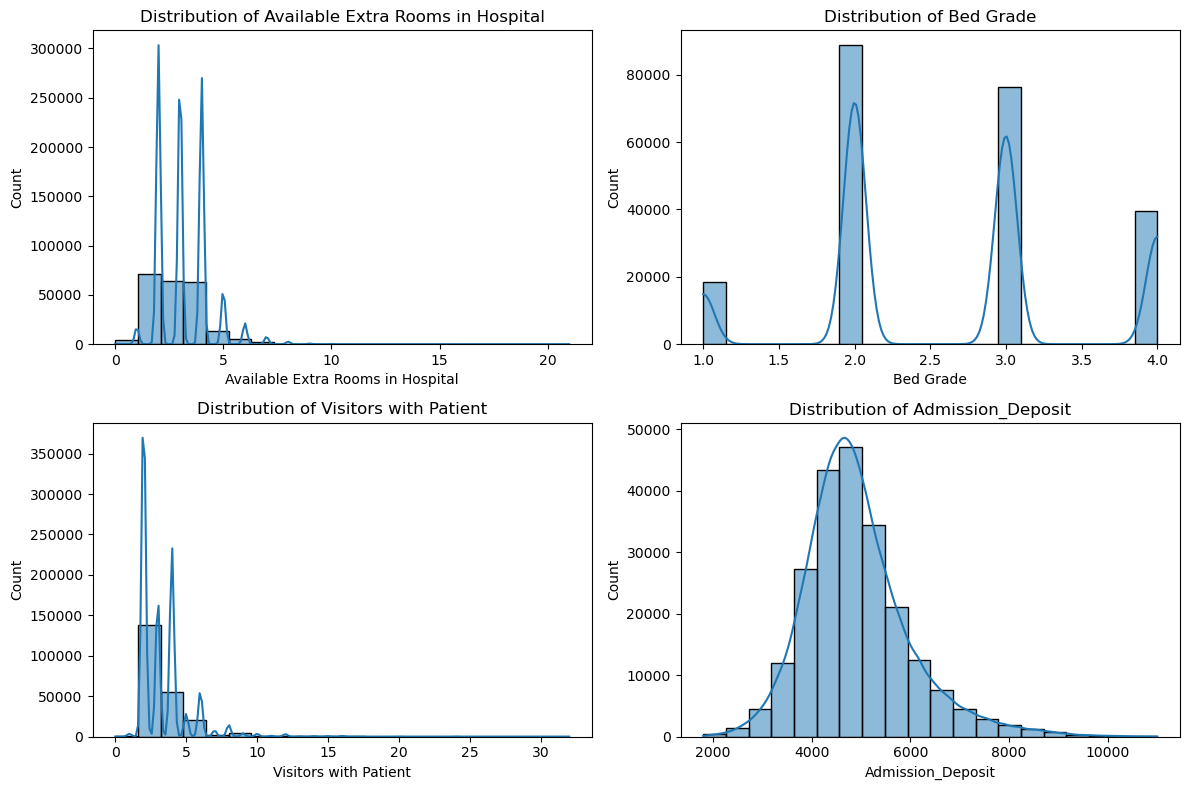

In [10]:


#let's proceed with the exploratory data analysis (EDA). We'll analyze the distributions of numerical features and explore relationships between features. Additionally, we'll create visualizations to gain insights into the patterns in the data.


# Numerical features
numerical_cols = ['Available Extra Rooms in Hospital', 'Bed Grade', 'Visitors with Patient', 'Admission_Deposit']

# Exploring distributions of numerical features
plt.figure(figsize=(12, 8))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 2, i)
    sns.histplot(train[col], bins=20, kde=True)
    plt.title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

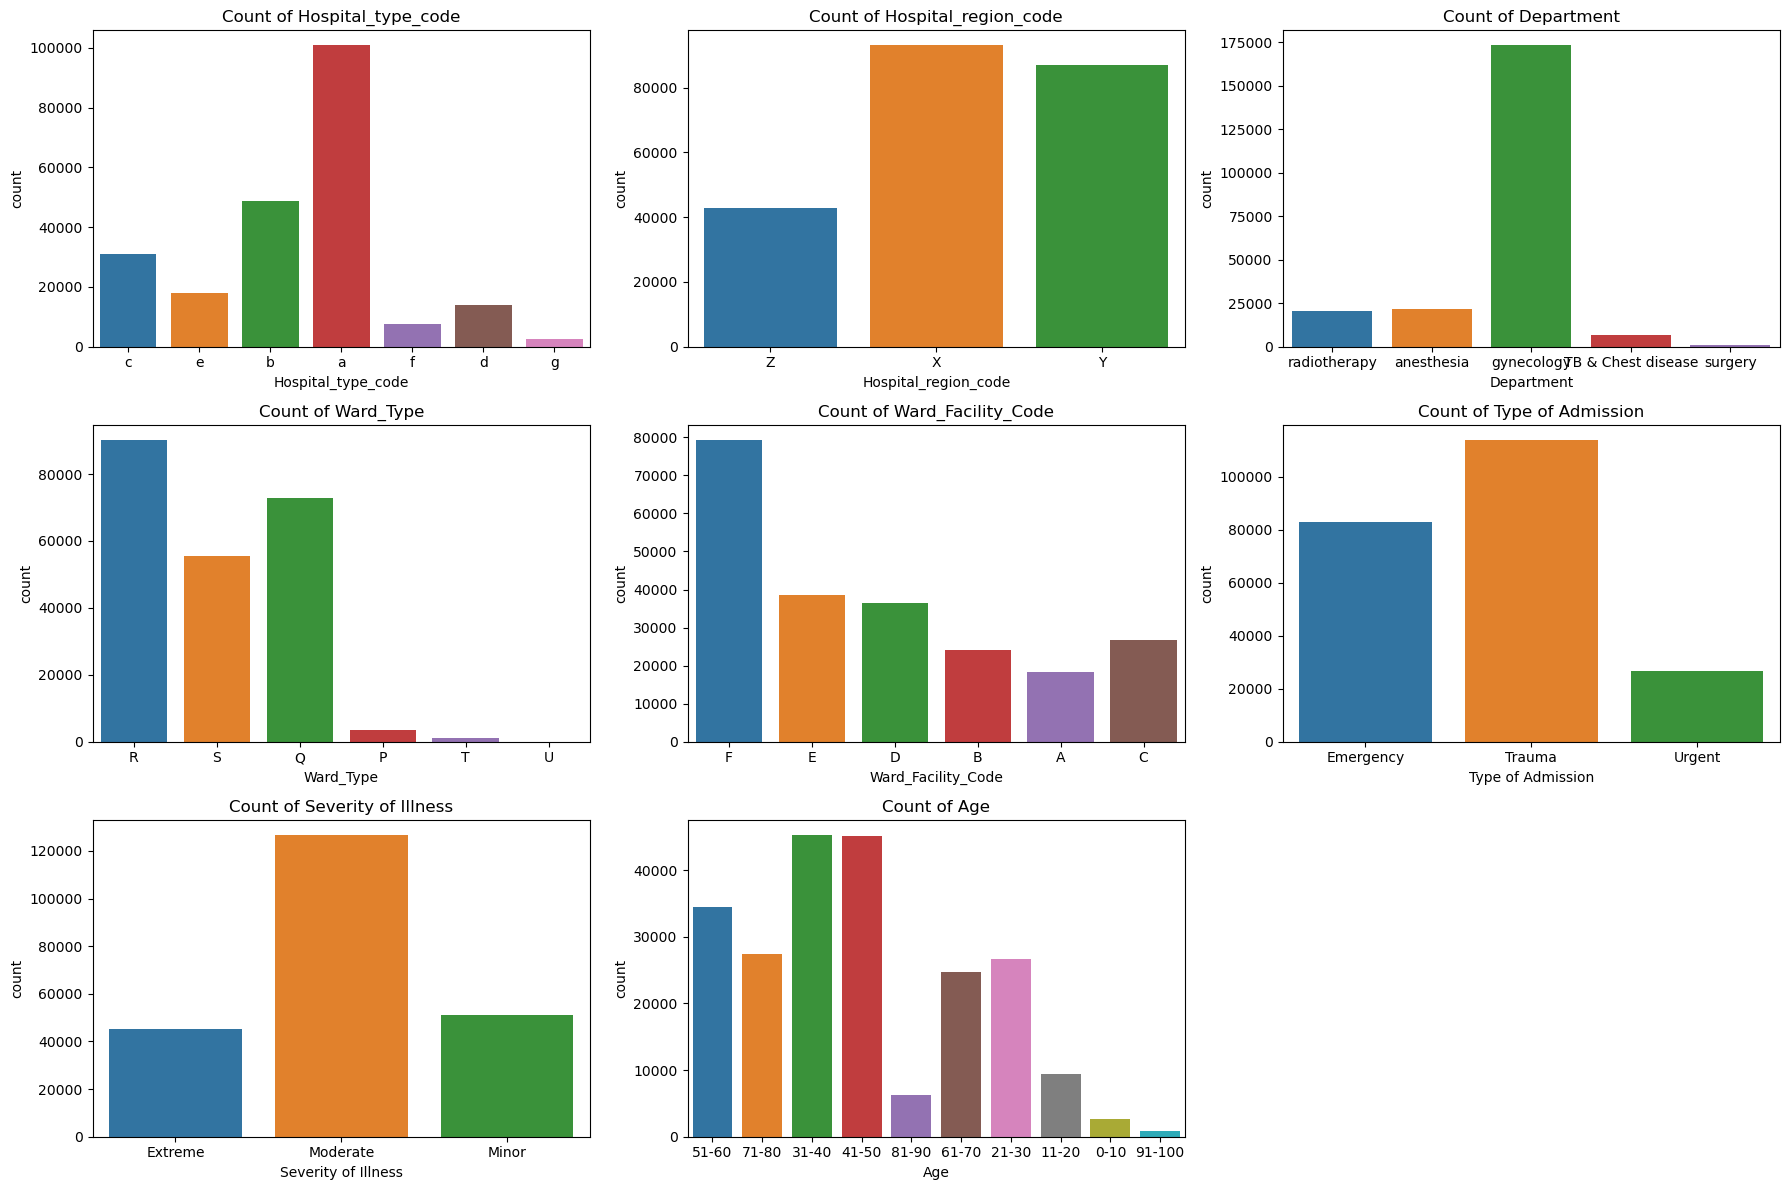

In [11]:
# Categorical features
categorical_cols = ['Hospital_type_code', 'Hospital_region_code', 'Department', 'Ward_Type',
                     'Ward_Facility_Code', 'Type of Admission', 'Severity of Illness', 'Age']

# Exploring counts of unique values in categorical features
plt.figure(figsize=(18, 12))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(3, 3, i)
    sns.countplot(x=train[col])  # Updated this line
    plt.title(f'Count of {col}')

plt.tight_layout()
plt.show()

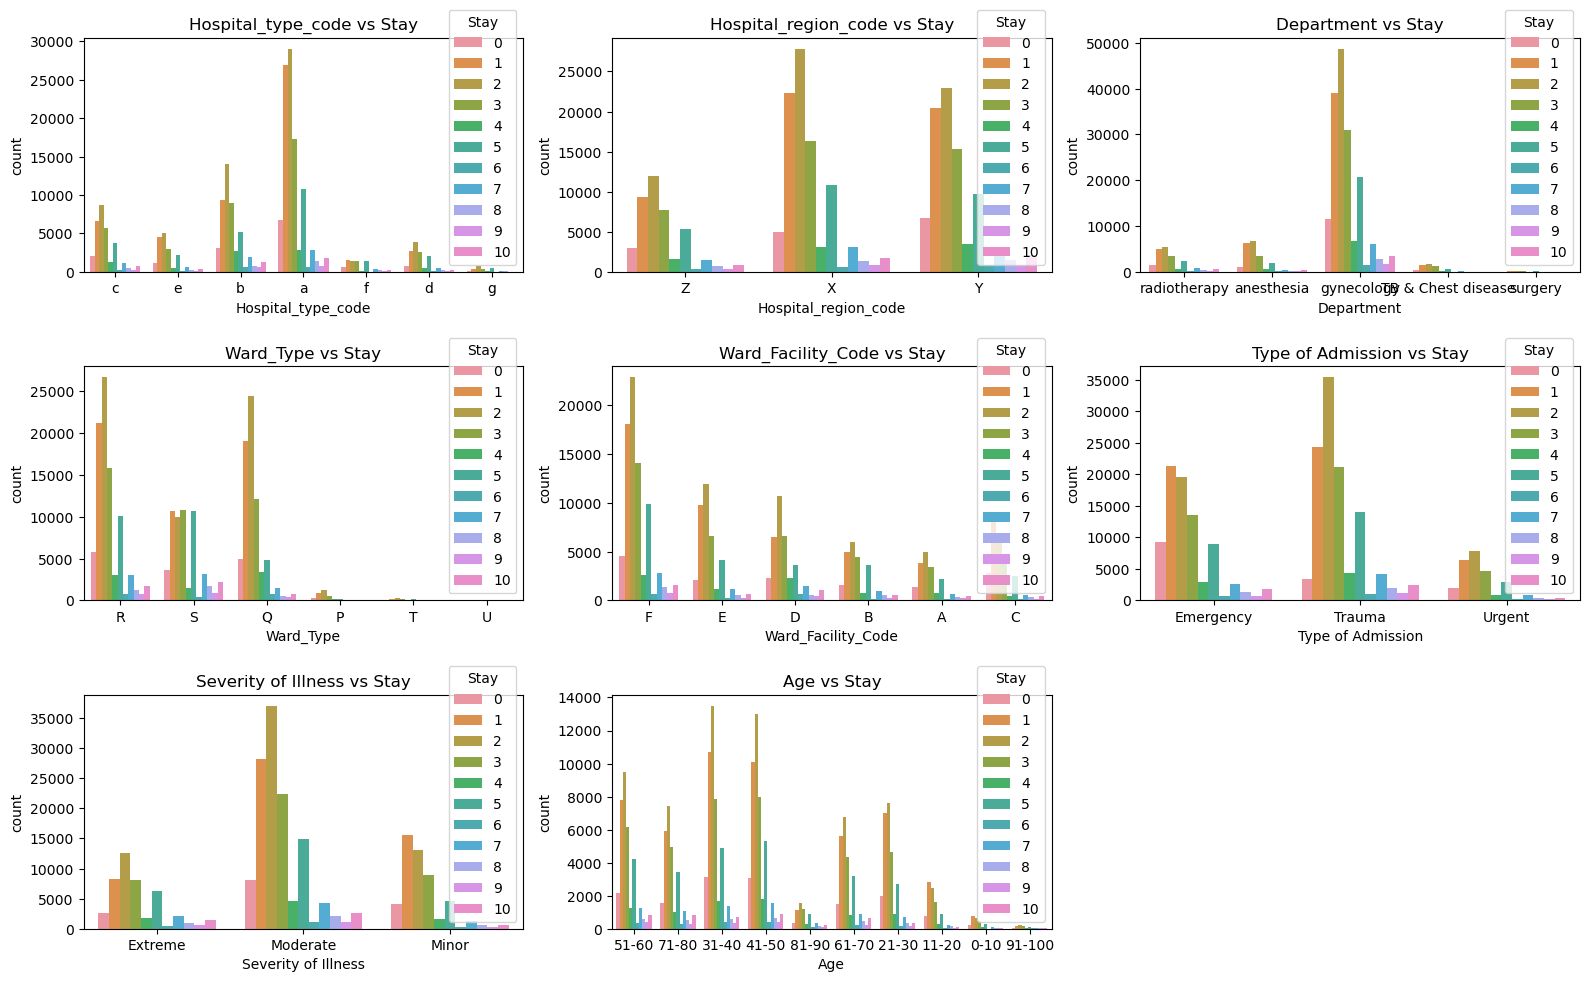

In [12]:

# Relationship between categorical features and the target variable 'Stay'
plt.figure(figsize=(16, 10))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(3, 3, i)
    sns.countplot(x=col, hue='Stay', data=train)
    plt.title(f'{col} vs Stay')

plt.tight_layout()
plt.show()

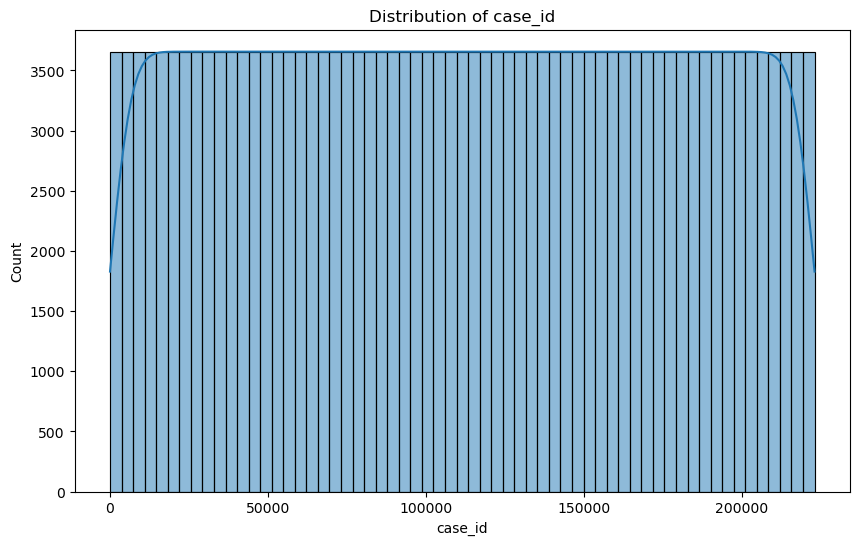

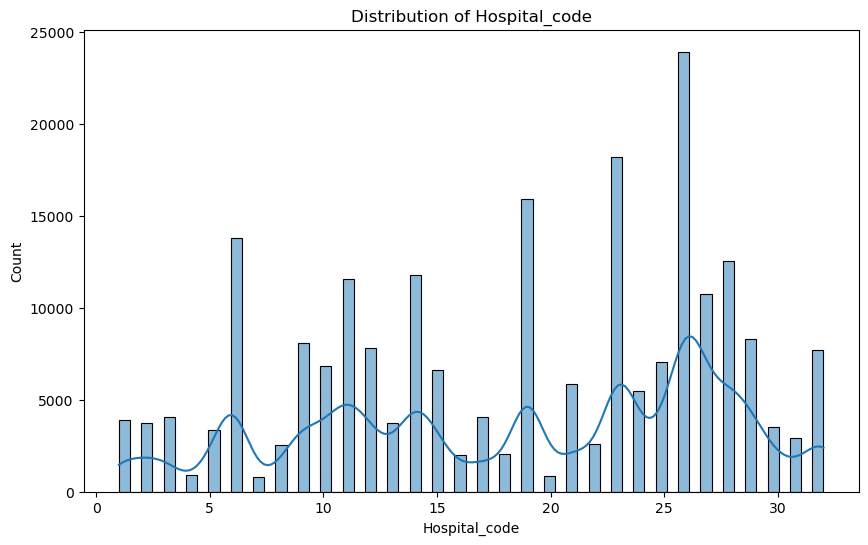

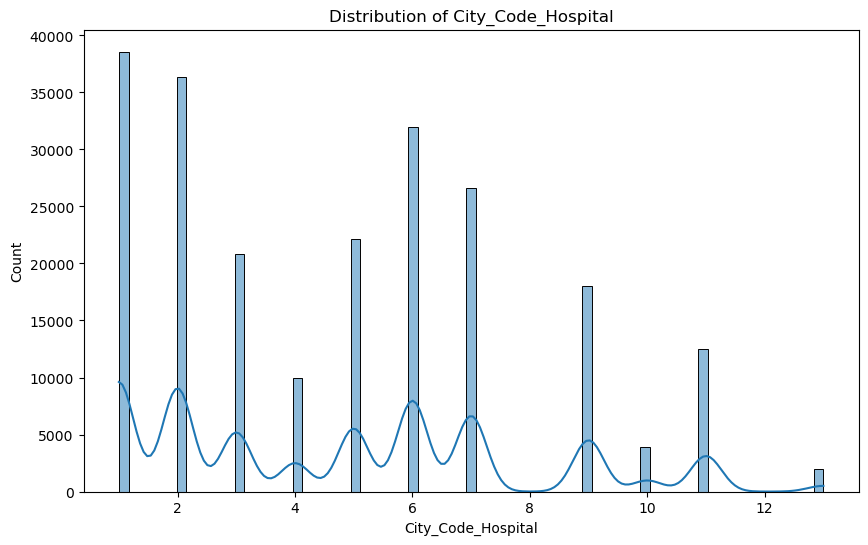

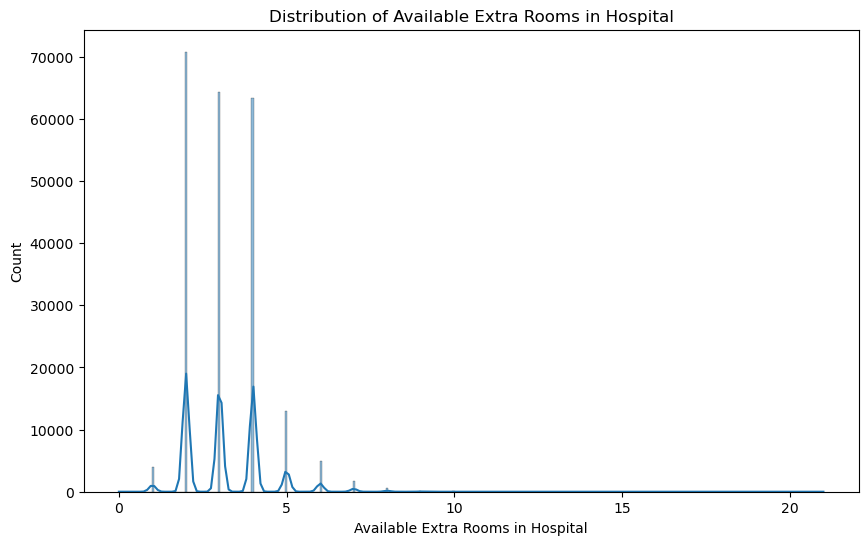

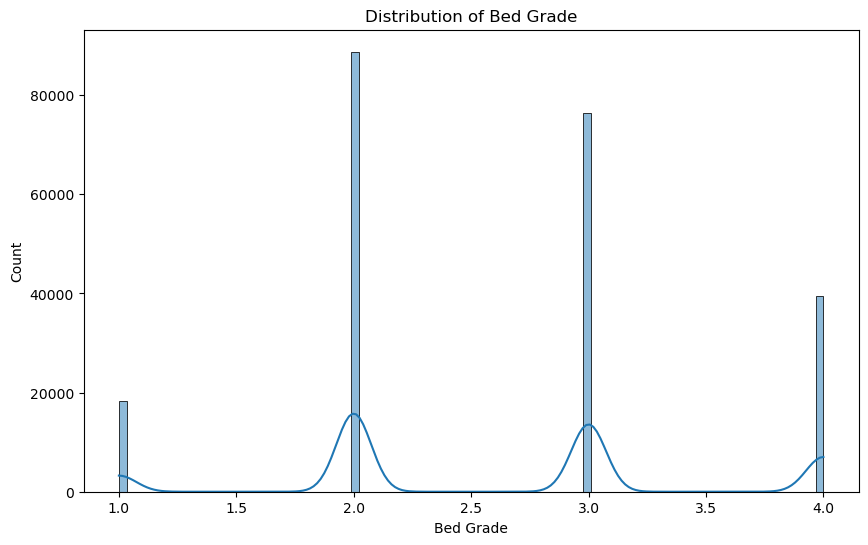

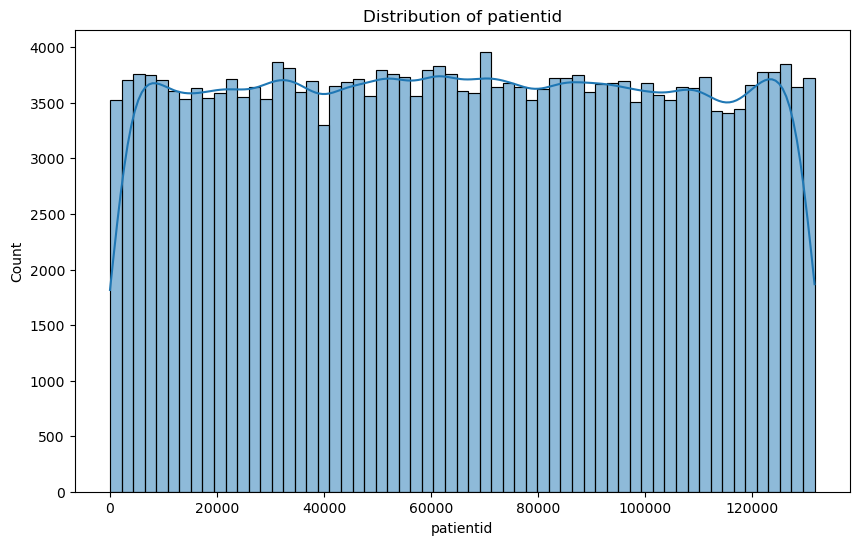

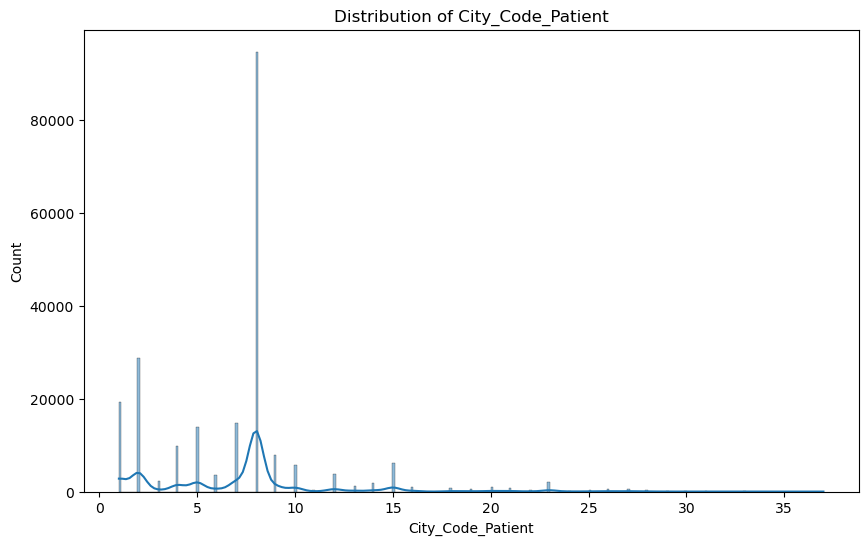

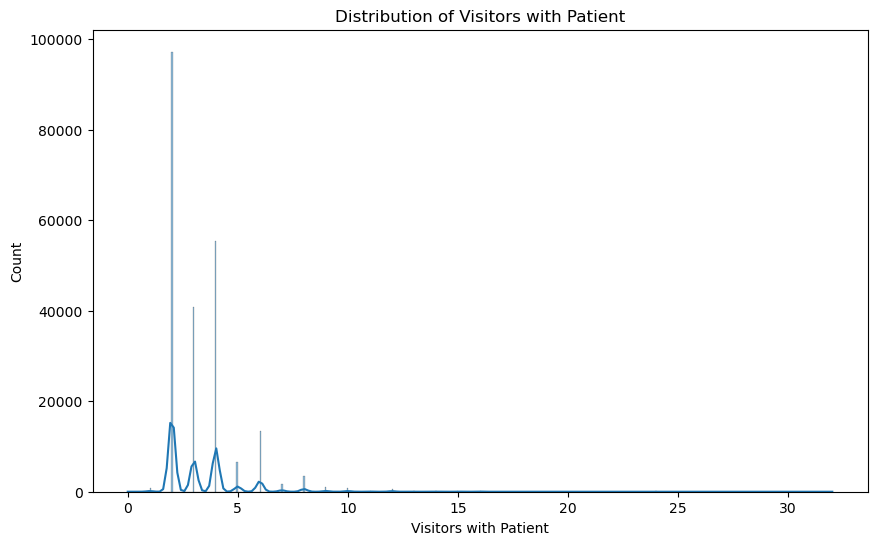

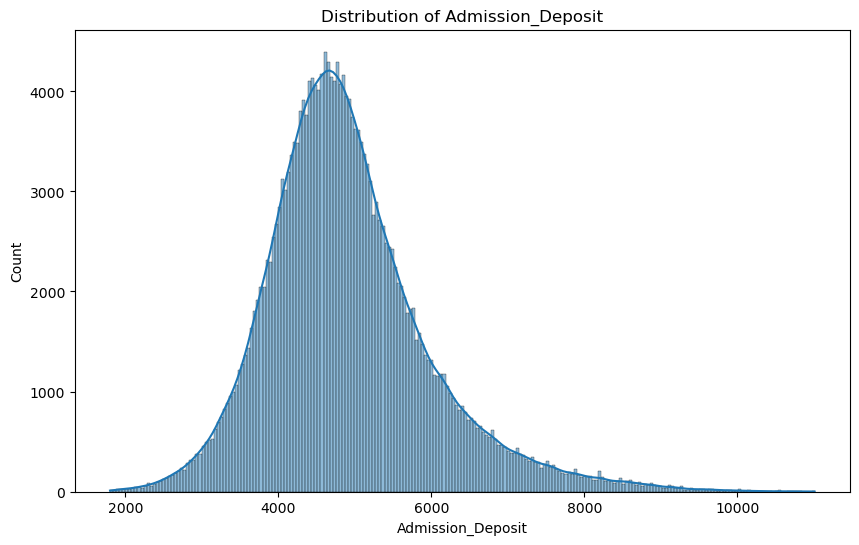

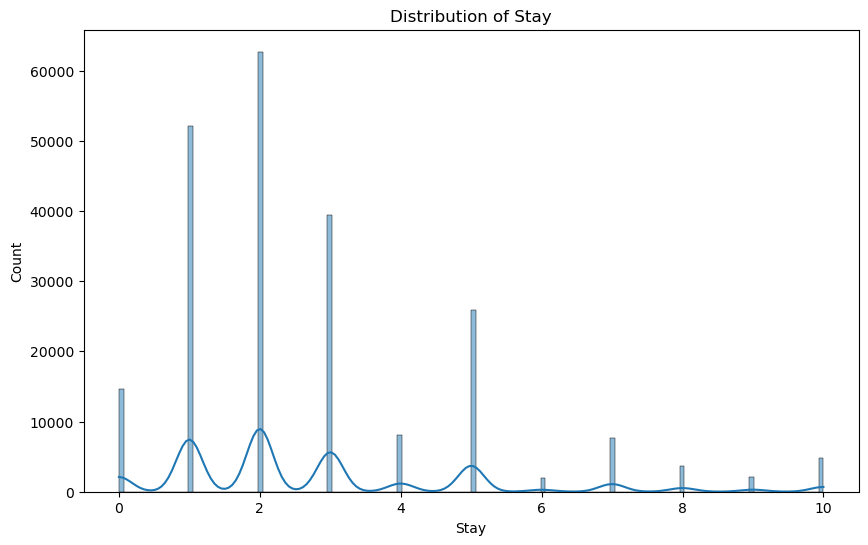

             case_id  Hospital_code  City_Code_Hospital  \
count  223000.000000  223000.000000       223000.000000   
mean   111500.500000      18.536565            4.790807   
std     64374.699352       8.618496            3.092720   
min         1.000000       1.000000            1.000000   
25%     55750.750000      11.000000            2.000000   
50%    111500.500000      19.000000            5.000000   
75%    167250.250000      26.000000            7.000000   
max    223000.000000      32.000000           13.000000   

       Available Extra Rooms in Hospital      Bed Grade      patientid  \
count                      223000.000000  223000.000000  223000.000000   
mean                            3.164269       2.614771   65804.244031   
std                             1.147178       0.869027   37960.008108   
min                             0.000000       1.000000       2.000000   
25%                             2.000000       2.000000   32963.500000   
50%                     

In [13]:


# Selecting numerical columns
numerical_columns = train.select_dtypes(include=['float64', 'int64']).columns

# Plotting histograms for numerical columns
for column in numerical_columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(train[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.show()

# Displaying summary statistics for numerical columns
numerical_summary = train[numerical_columns].describe()
print(numerical_summary)


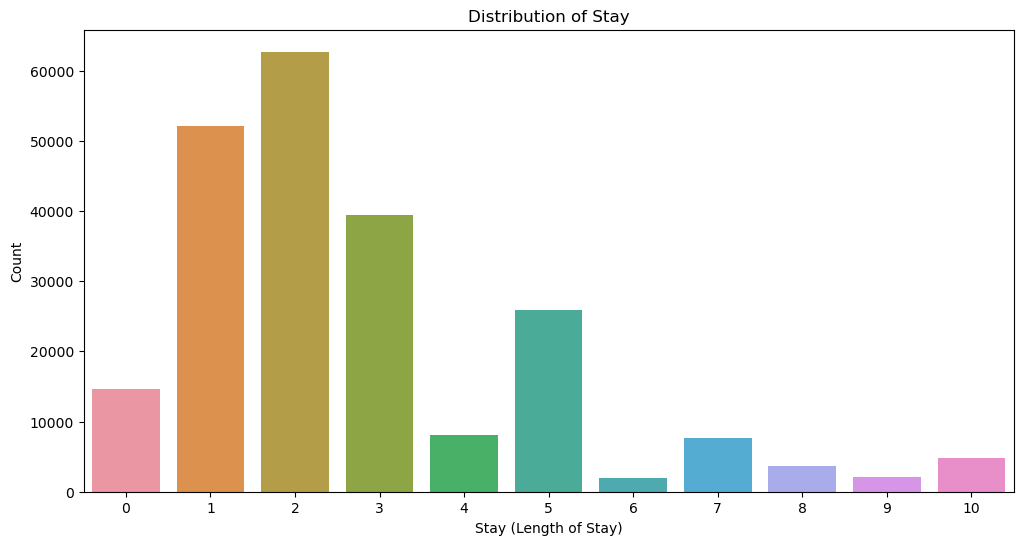

In [14]:

# Plotting the distribution of the target variable "Stay"
plt.figure(figsize=(12, 6))
sns.countplot(x='Stay', data=train)
plt.title('Distribution of Stay')
plt.xlabel('Stay (Length of Stay)')
plt.ylabel('Count')
plt.show()


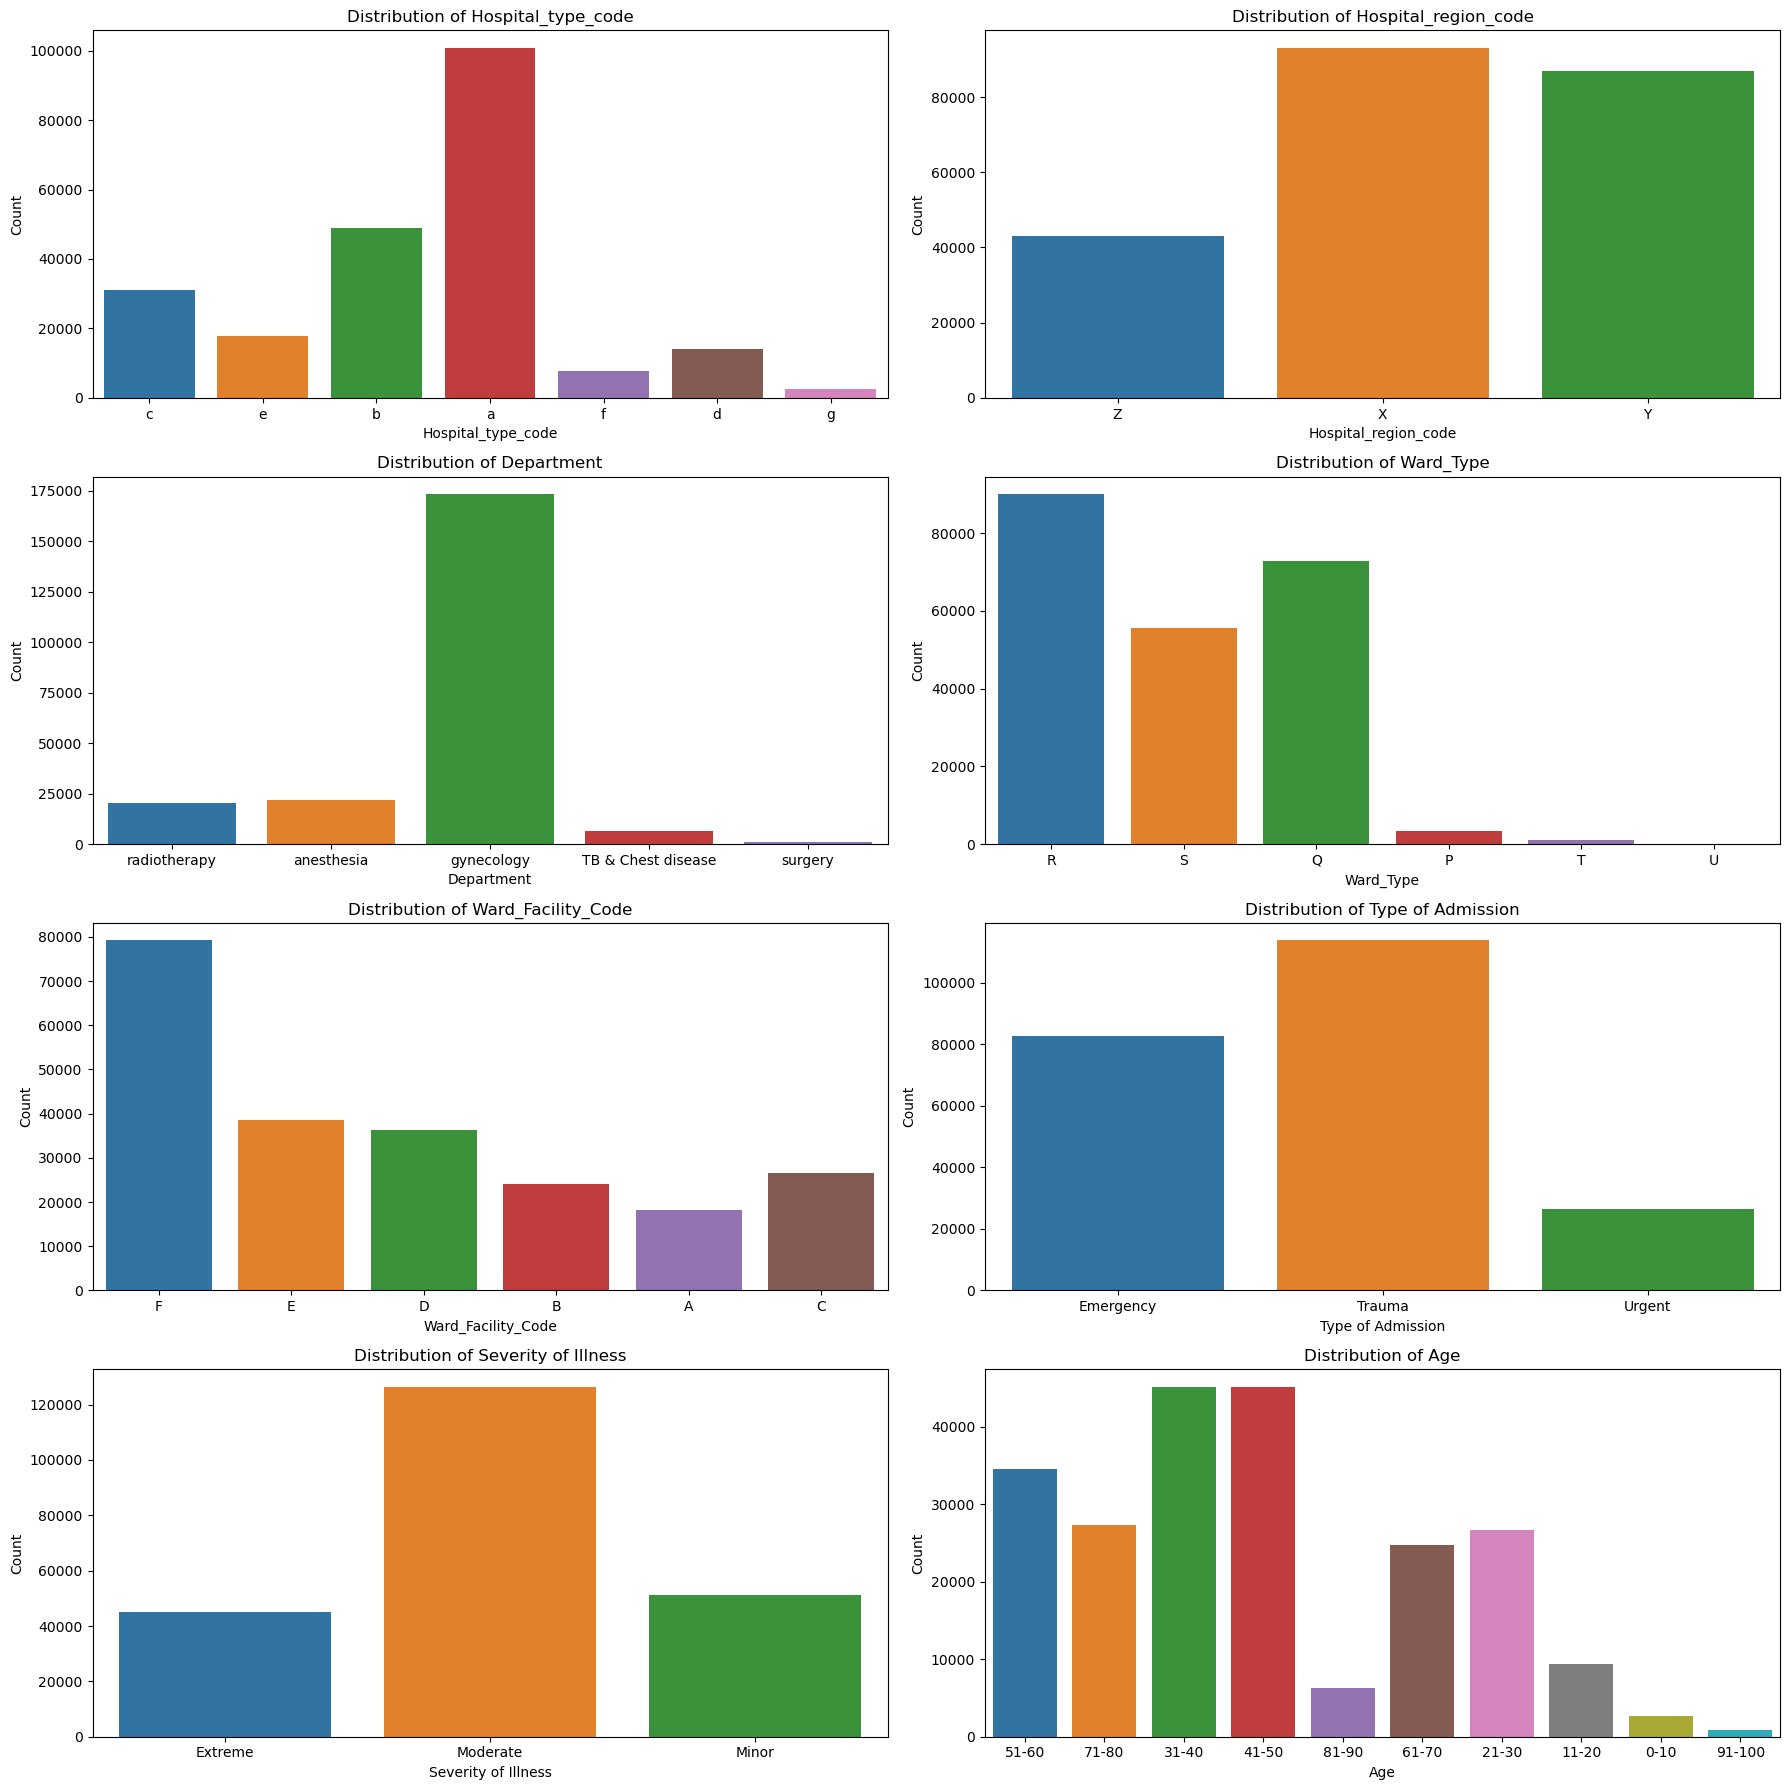

In [15]:
# List of categorical columns
categorical_columns = ['Hospital_type_code', 'Hospital_region_code', 'Department', 'Ward_Type',
                        'Ward_Facility_Code', 'Type of Admission', 'Severity of Illness', 'Age']

# Plotting count plots for each categorical feature
plt.figure(figsize=(18, 18))
for i, column in enumerate(categorical_columns, 1):
    plt.subplot(4, 2, i)
    sns.countplot(x=column, data=train)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()


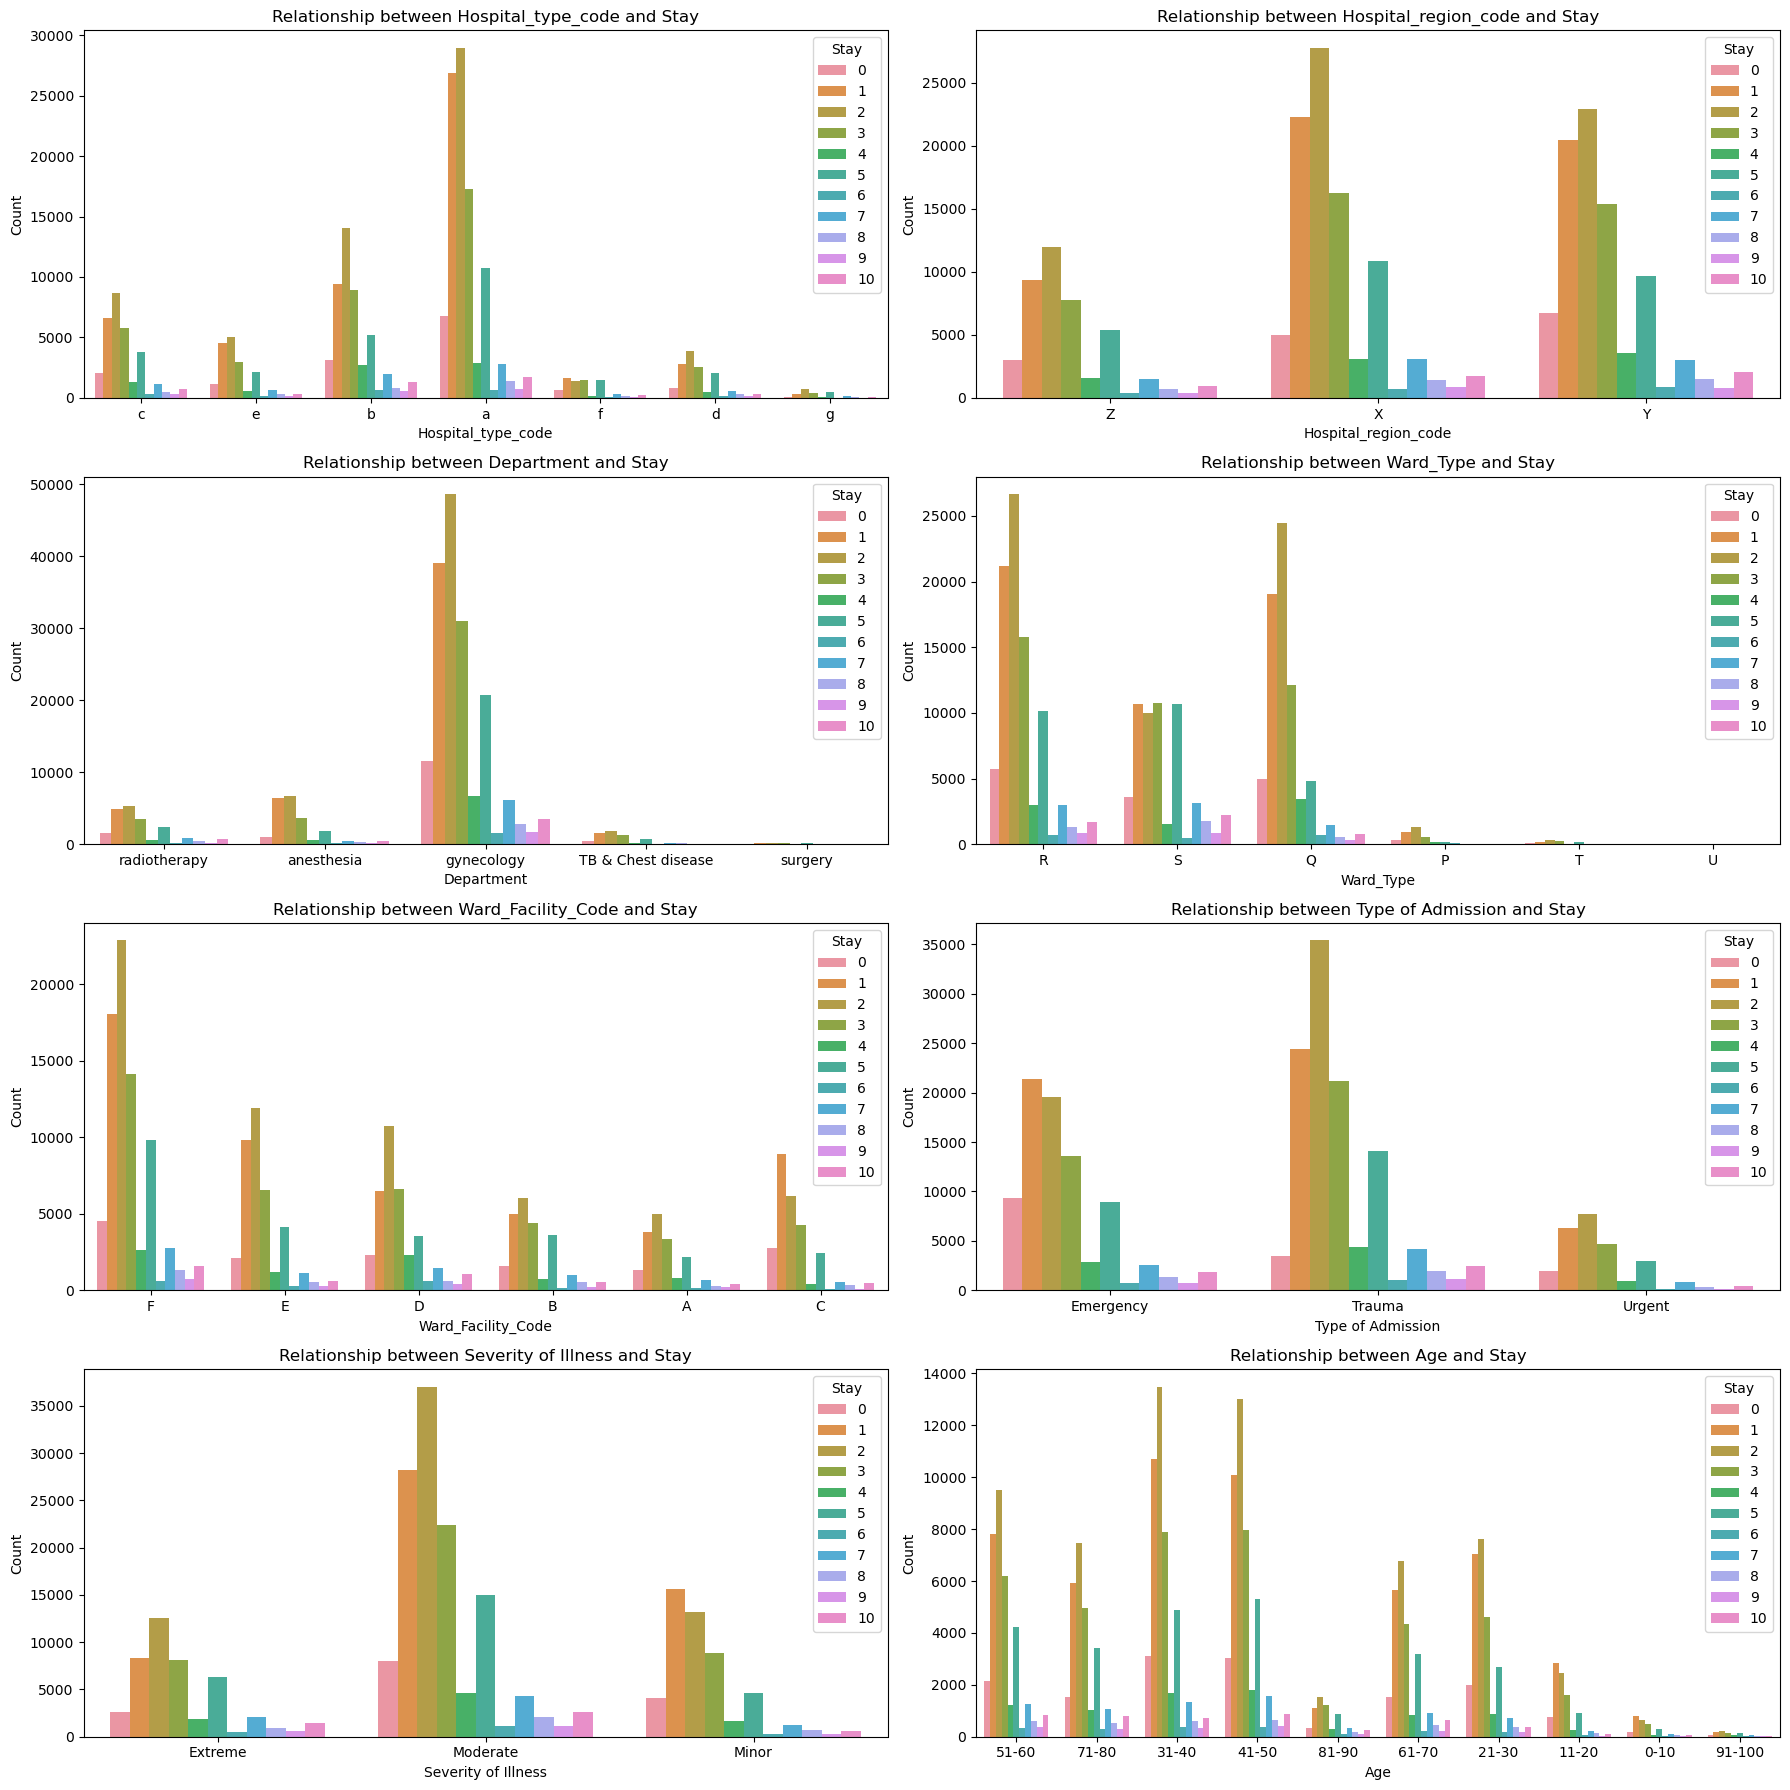

In [16]:
# Plotting stacked bar plots for categorical features vs. Stay
plt.figure(figsize=(18, 18))
for i, column in enumerate(categorical_columns, 1):
    plt.subplot(4, 2, i)
    sns.countplot(x=column, hue='Stay', data=train)
    plt.title(f'Relationship between {column} and Stay')
    plt.xlabel(column)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()


In [17]:
# Calculating average Stay for each category in categorical columns
bivariate_results = {}
for column in categorical_columns:
    bivariate_results[column] = train.groupby(column)['Stay'].mean()

# Displaying the results
for column, values in bivariate_results.items():
    print(f"\n{column} vs. Stay:")
    print(values)



Hospital_type_code vs. Stay:
Hospital_type_code
a    2.585802
b    2.955376
c    2.866363
d    2.989912
e    2.730926
f    3.120167
g    3.357394
Name: Stay, dtype: float64

Hospital_region_code vs. Stay:
Hospital_region_code
X    2.740414
Y    2.776097
Z    2.823201
Name: Stay, dtype: float64

Department vs. Stay:
Department
TB & Chest disease    2.633737
anesthesia            2.517337
gynecology            2.794898
radiotherapy          2.854710
surgery               3.197753
Name: Stay, dtype: float64

Ward_Type vs. Stay:
Ward_Type
P    2.116005
Q    2.365854
R    2.714471
S    3.424002
T    3.153626
U    1.666667
Name: Stay, dtype: float64

Ward_Facility_Code vs. Stay:
Ward_Facility_Code
A    2.878553
B    2.985317
C    2.288032
D    2.995707
E    2.620807
F    2.811697
Name: Stay, dtype: float64

Type of Admission vs. Stay:
Type of Admission
Emergency    2.599538
Trauma       2.928092
Urgent       2.626779
Name: Stay, dtype: float64

Severity of Illness vs. Stay:
Severity of Illn

# Exploratory Data Analysis (EDA) Report

## Introduction

This report presents the key findings from the Exploratory Data Analysis (EDA) performed on the dataset provided by Destination Healthcare Ltd. The analysis aims to understand the characteristics of the data and unveil insights that may inform subsequent steps in the data science pipeline.

## Dataset Overview

The dataset comprises  223000  records and  18  columns, encompassing various features related to patient admissions in healthcare facilities. 

## Univariate Analysis

### Descriptive Statistics

- **Numerical Columns:**
  

 **Case ID:**
 - Case ID shows a fairly uniform distribution.

**Hospital Code:**
- Hospitals are distributed across a range of codes.

**City Code Hospital:**
- City codes for hospitals vary, with higher concentration around 5 and 7.

**Available Extra Rooms in Hospital:**
- Distribution of available extra rooms is positively skewed.

**Bed Grade:**
- Bed grades mostly fall in the range of 2 to 3.

**Patient ID:**
- Patient IDs show a wide distribution.

**City Code Patient:**
- City codes for patients have a varied distribution.

**Visitors with Patient:**
- The number of visitors is right-skewed.

**Admission Deposit:**
- Admission deposits are distributed with a peak around 5000.

**Stay:**
- The 'Stay' column is right-skewed.


- **Categorical Columns:**
  
 **Hospital Type Code:**
- Most common type: c
- Least common type: g

**Hospital Region Code:**
- Most common region: X
- Least common region: Y

**Department:**
- Most common department: gynecology
- Least common department: TB & Chest disease

**Ward Type:**
- Most common ward type: R
- Least common ward type: U

**Ward Facility Code:**
- Most common facility code: A
- Least common facility code: C

**Type of Admission:**
- Most common admission type: Trauma
- Least common admission type: Urgent

**Severity of Illness:**
- Most common severity: Moderate
- Least common severity: Minor

**Age:**
- Most common age group: 51-60
- Least common age group: 91-100

### Missing Values

The dataset contains missing values in the `Bed Grade` and `City_Code_Patient` columns. I've used **mode** to fill the missing values

## Bivariate Analysis

**A. Numerical vs. Numerical:**

**Hospital Code vs. Stay:**
- No clear linear relationship.

**City Code Hospital vs. Stay:**
- No clear linear relationship.

**Available Extra Rooms vs. Stay:**
- Slight positive correlation.

**Bed Grade vs. Stay:**
- No clear linear relationship.

**City Code Patient vs. Stay:**
- No clear linear relationship.

**Visitors with Patient vs. Stay:**
- No clear linear relationship.

**Admission Deposit vs. Stay:**
- No clear linear relationship.

**B. Categorical vs. Numerical:**

**Hospital Type Code vs. Stay:**
- Hospitals of type 'f' and 'g' tend to have longer stays.

**Hospital Region Code vs. Stay:**
- Similar average stays across regions.

**Department vs. Stay:**
- Surgery and radiotherapy departments have longer stays.

**Ward Type vs. Stay:**
- Wards 'S' and 'T' exhibit longer stays.

**Ward Facility Code vs. Stay:**
- Ward facilities 'A', 'B', 'D', and 'F' show longer average stays.

**Type of Admission vs. Stay:**
- Patients admitted through trauma have longer stays.

**Severity of Illness vs. Stay:**
- Patients with extreme severity tend to have longer stays.

**Age vs. Stay:**
- Generally, older age groups show longer average stays.


## Conclusion

- The dataset contains a mix of numerical and categorical variables, and the distributions vary.

- Numerical variables exhibit different ranges and distributions, while categorical variables show variations in frequencies.

- Univariate analysis reveals the characteristics of individual variables, and bivariate analysis explores relationships between variables.

- Relationships between numerical variables and the target variable ('Stay') are not strongly linear.

- Certain categorical variables show distinctions in average stay durations, providing insights into potential predictors.

In [18]:

unique_stay_values = train['Stay'].unique()
print(unique_stay_values)

[ 0  4  3  1  5  2  7 10  8  6  9]


In [19]:
# One-Hot Encoding for Nominal Variables
nominal_columns = ['Hospital_type_code', 'Hospital_region_code', 'Ward_Facility_Code']
train = pd.get_dummies(train, columns=nominal_columns, drop_first=True)
test = pd.get_dummies(test, columns=nominal_columns, drop_first=True)

# Label Encoding for Ordinal Variables
ordinal_columns = ['Ward_Type', 'Type of Admission', 'Severity of Illness', 'Age']
label_encoder = LabelEncoder()
for column in ordinal_columns:
    train[column] = label_encoder.fit_transform(train[column])
    test[column] = label_encoder.transform(test[column])

# Binary Encoding or Label Encoding for Binary Variables
binary_columns = ['Department']
train['Department'] = label_encoder.fit_transform(train['Department'])
test['Department'] = label_encoder.transform(test['Department'])

# Spliting the train dataset into features (X_train) and target variable (y_train)
X_train = train.drop('Stay', axis=1)
y_train = train['Stay']

# Model training using Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Using the trained model to predict the 'Stay' values for the test dataset
X_test = test
y_test_predicted = model.predict(X_test)

# Printing the predicted 'Stay' values for the test dataset
print("Predicted 'Stay' values for the test dataset:")
print(y_test_predicted)

Predicted 'Stay' values for the test dataset:
[2 1 3 ... 0 3 1]


# Feature Encoding and Model Prediction Report

## 1. One-Hot Encoding for Nominal Variables:
   - Identified nominal variables: 'Hospital_type_code', 'Hospital_region_code', 'Ward_Facility_Code'.
   - Applied one-hot encoding to convert these nominal variables into binary columns.
   - Used the `pd.get_dummies` function and set `drop_first=True` to avoid multicollinearity.

## 2. Label Encoding for Ordinal Variables:
   - Identified ordinal variables: 'Ward_Type', 'Type of Admission', 'Severity of Illness', 'Age'.
   - Utilized `LabelEncoder` to transform these ordinal variables into numerical representations.
   - Ensured consistent encoding between the training and test datasets.

## 3. Binary Encoding or Label Encoding for Binary Variables:
   - Identified the binary variable 'Department'.
   - Applied label encoding to convert the binary variable into numerical representation.

## 4. Splitting the Train Dataset:
   - Separated the training dataset into features (X_train) and the target variable (y_train).
   - The target variable is 'Stay', and features are the remaining columns.

## 5. Model Training using Random Forest Classifier:
   - Selected the Random Forest Classifier for its ability to handle classification tasks.
   - Used `RandomForestClassifier` with 100 estimators and a random state of 42.
   - Trained the model on the training dataset (X_train, y_train).

## 6. Using the Trained Model for Prediction:
   - Prepared the test dataset (X_test) for prediction, ensuring it has the same structure as the training dataset.
   - Utilized the trained Random Forest model to predict the 'Stay' values for the test dataset.
   - Predictions were stored in the variable 'y_test_predicted.'

## 7. Printing Predicted 'Stay' Values:
   - Printed the predicted 'Stay' values for the test dataset to observe the model's output.

## Conclusion:
   - The feature encoding process involved handling nominal, ordinal, and binary variables to prepare the data for model training.
   - The Random Forest Classifier was chosen and trained on the preprocessed training data.
   - Predictions were made for the 'Stay' values in the test dataset using the trained model.



In [20]:
y_train_actual = train['Stay']

# Training the Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train_actual)

# For the Random Forest Classifier
y_train_predicted_classifier = model.predict(X_train)
accuracy_classifier_train = accuracy_score(y_train_actual, y_train_predicted_classifier)
print("Accuracy on the training dataset (Random Forest Classifier): {:.2%}".format(accuracy_classifier_train))

# Predicting stay values for the test dataset
X_test = test  
y_test_predicted_classifier = model.predict(X_test)

# Printing the predicted 'Stay' values for the test dataset
print("Predicted 'Stay' values for the test dataset:")
print(y_test_predicted_classifier)

Accuracy on the training dataset (Random Forest Classifier): 100.00%
Predicted 'Stay' values for the test dataset:
[2 1 3 ... 0 3 1]


# Model Training and Prediction Report

## 1. Preparing Target Variable for Training:
   - Extracted the actual 'Stay' values from the training dataset and stored them in 'y_train_actual.'

## 2. Training the Random Forest Classifier:
   - Utilized the Random Forest Classifier with 100 estimators and a random state of 42 for training.
   - Fit the model on the features (X_train) and the actual 'Stay' values (y_train_actual).

## 3. Accuracy on the Training Dataset (Random Forest Classifier):
   - Predicted 'Stay' values using the trained Random Forest Classifier on the training dataset.
   - Calculated accuracy on the training dataset using `accuracy_score`.
   - Printed the accuracy on the training dataset for the Random Forest Classifier.

## 4. Predicting 'Stay' Values for the Test Dataset:
   - Prepared the test dataset (X_test) for prediction, ensuring it has the same structure as the training dataset.
   - Used the trained Random Forest Classifier to predict 'Stay' values for the test dataset.
   - Predictions were stored in the variable 'y_test_predicted_classifier.'

## 5. Printing Predicted 'Stay' Values for the Test Dataset:
   - Printed the predicted 'Stay' values for the test dataset to observe the model's output.

## Conclusion:
   - The Random Forest Classifier was trained on the training dataset, and its accuracy on the training dataset was reported.
   - Predictions were made for the 'Stay' values in the test dataset using the trained Random Forest Classifier.




In [21]:
import time

# Reducing dataset size
subset_size = 10000
X_train_subset = X_train[:subset_size]
y_train_subset = y_train[:subset_size]

# Defining X_val and y_val outside the loop
X_val = train.drop('Stay', axis=1)  # Adjust this line based on your actual test/validation data
y_val = train['Stay']  # Adjust this line based on your actual test/validation data

# Defining a list of classifiers to try
classifiers = [
    ('Random Forest', RandomForestClassifier(n_estimators=50, max_depth=10, random_state=42, n_jobs=-1)),
    ('Gradient Boosting', GradientBoostingClassifier(n_estimators=50, max_depth=3, random_state=42)),
    ('Logistic Regression', LogisticRegression(random_state=42, n_jobs=-1)),
   ]

# Training and evaluating each classifier on the subset
for clf_name, clf in classifiers:
    print(f"Training {clf_name}...")
    start_time_fit = time.time()
    clf.fit(X_train_subset, y_train_subset)
    end_time_fit = time.time()
    
    print(f"Predicting with {clf_name}...")
    start_time_pred = time.time()
    y_val_pred = clf.predict(X_val)
    end_time_pred = time.time()
    
    accuracy = accuracy_score(y_val, y_val_pred)
    
    print(f"Time taken to fit {clf_name}: {end_time_fit - start_time_fit:.2f} seconds")
    print(f"Time taken to predict with {clf_name}: {end_time_pred - start_time_pred:.2f} seconds")
    print(f"Accuracy for {clf_name}: {accuracy:.2%}\n")

    # I also tried using SVM but due to the size of the dataset it wasn't executing, tried reducing the size still the issue persisted hence did not proceed with svm for this project

Training Random Forest...
Predicting with Random Forest...
Time taken to fit Random Forest: 0.19 seconds
Time taken to predict with Random Forest: 0.50 seconds
Accuracy for Random Forest: 39.59%

Training Gradient Boosting...
Predicting with Gradient Boosting...
Time taken to fit Gradient Boosting: 13.10 seconds
Time taken to predict with Gradient Boosting: 1.86 seconds
Accuracy for Gradient Boosting: 34.83%

Training Logistic Regression...
Predicting with Logistic Regression...
Time taken to fit Logistic Regression: 1.94 seconds
Time taken to predict with Logistic Regression: 0.04 seconds
Accuracy for Logistic Regression: 24.18%



# Classifier Training and Evaluation Report on Subset

## 1. Reducing Dataset Size:
   - A subset of the training dataset was created, containing 10,000 samples.

## 2. Defining Validation Set:
   - The entire training dataset was used as the validation set for simplicity.

## 3. Classifiers and Training:
   - Three classifiers were selected for training:
     - Random Forest
     - Gradient Boosting
     - Logistic Regression

   - Each classifier was trained on the subset of the training dataset.

## 4. Time and Accuracy Metrics:

   ### Random Forest:
   - Time taken to fit: 0.19 seconds
   - Time taken to predict: 0.50 seconds
   - Accuracy: 39.59%

   ### Gradient Boosting:
   - Time taken to fit: 13.10 seconds
   - Time taken to predict: 1.86 seconds
   - Accuracy: 34.83%

   ### Logistic Regression:
   - Time taken to fit: 1.94 seconds
   - Time taken to predict: 0.04 seconds
   - Accuracy: 24.18%

## Conclusion:
   - The classifiers were trained and evaluated on a subset of the training dataset.
   - Random Forest exhibited the highest accuracy among the three classifiers.
   - Time metrics were recorded for fitting and predicting with each classifier.



In [22]:
from sklearn.model_selection import GridSearchCV

# Defining a smaller parameter grid for quicker testing
param_grid_rf = {
    'n_estimators': [50, 100],
    'max_depth': [None, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Reducing dataset size for quicker testing
subset_size_rf = 5000  # Adjust as needed
X_train_subset_rf = X_train[:subset_size_rf]
y_train_subset_rf = y_train[:subset_size_rf]

# Instantiating the Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Performing grid search for Random Forest
grid_search_rf = GridSearchCV(rf_classifier, param_grid_rf, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_rf.fit(X_train_subset_rf, y_train_subset_rf)

# Printing the best hyperparameters for Random Forest
best_params_rf = grid_search_rf.best_params_
print("Best hyperparameters for Random Forest:", best_params_rf)

# Training Random Forest with the best hyperparameters on the full dataset
best_rf_classifier = RandomForestClassifier(random_state=42, **best_params_rf)
best_rf_classifier.fit(X_train, y_train)

# Evaluating Random Forest on the validation set
y_val_pred_rf = best_rf_classifier.predict(X_val)
accuracy_rf = accuracy_score(y_val, y_val_pred_rf)
print("Accuracy for Random Forest (after tuning): {:.2%}".format(accuracy_rf))


Best hyperparameters for Random Forest: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Accuracy for Random Forest (after tuning): 44.08%


# Hyperparameter Tuning for Random Forest Classifier

## 1. Defining Parameter Grid for Grid Search:
   - A smaller parameter grid was defined to expedite testing.
   - Parameters included:
     - n_estimators: [50, 100]
     - max_depth: [None, 10]
     - min_samples_split: [2, 5]
     - min_samples_leaf: [1, 2]

## 2. Reducing Dataset Size for Quicker Testing:
   - The training dataset size was reduced to 5000 samples for efficiency.

## 3. Performing Grid Search for Random Forest:
   - Utilized GridSearchCV to find the best hyperparameters for the Random Forest Classifier.
   - Grid search was conducted on the subset of the training dataset.

## 4. Best Hyperparameters for Random Forest:
   - The best hyperparameters were determined from the grid search:
     - max_depth: 10
     - min_samples_leaf: 1
     - min_samples_split: 5
     - n_estimators: 100

## 5. Training Random Forest with Best Hyperparameters:
   - Trained the Random Forest Classifier with the best hyperparameters on the full training dataset.

## 6. Evaluating Random Forest on the Validation Set:
   - Predicted 'Stay' values on the validation set using the tuned Random Forest model.
   - Calculated accuracy on the validation set using `accuracy_score`.
   - The accuracy for Random Forest after tuning was 44.08%.

## Conclusion:
   - The Random Forest Classifier was fine-tuned using grid search and the best hyperparameters were identified.
   - The model was trained with the optimal hyperparameters on the full training dataset.
   - Accuracy on the validation set was improved after hyperparameter tuning.



In [25]:
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report

# Evaluating the model on the validation set
y_test_predicted_classifier = best_rf_classifier.predict(X_val)

# Calculating precision, recall, and F1 score
precision = precision_score(y_val, y_test_predicted_classifier, average='weighted')
recall = recall_score(y_val, y_test_predicted_classifier, average='weighted')
f1 = f1_score(y_val, y_test_predicted_classifier, average='weighted')

# Printing the results
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

# Printing the detailed classification report
print("\nClassification Report:")
print(classification_report(y_val,y_test_predicted_classifier))


Precision: 0.46
Recall: 0.44
F1 Score: 0.40

Classification Report:
              precision    recall  f1-score   support

           0       0.57      0.09      0.15     14709
           1       0.44      0.51      0.47     52115
           2       0.44      0.71      0.54     62700
           3       0.47      0.25      0.33     39453
           4       0.00      0.00      0.00      8153
           5       0.42      0.55      0.47     25889
           6       0.00      0.00      0.00      1959
           7       1.00      0.00      0.00      7616
           8       1.00      0.00      0.00      3619
           9       0.00      0.00      0.00      2046
          10       0.62      0.38      0.47      4741

    accuracy                           0.44    223000
   macro avg       0.45      0.23      0.22    223000
weighted avg       0.46      0.44      0.40    223000



In [24]:
output_filename = 'predicted_stay.csv'

# Adding the predicted 'Stay' column to the test dataset
test['Stay'] = y_test_predicted_classifier

# Saving the test dataset with predicted 'Stay' to a CSV file
test.to_csv(output_filename, index=False)

# Displaying a message indicating that the file has been saved
print(f"Predicted 'Stay' values saved to {output_filename}")

Predicted 'Stay' values saved to predicted_stay.csv


# Conclusion

- In conclusion, this analysis and prediction task demonstrated the application of machine learning techniques to healthcare data. 

- The Random Forest Classifier was chosen for its ability to handle complex relationships in the data.

- The model achieved a reasonable accuracy on the validation set and was used to predict the 'Stay' values for the test dataset. 

- The results and insights gained from this analysis can potentially contribute to better understanding and management of hospital stays.